## CCIT4092 Data Visualization 2020/2021--- Individual Project
### Name: Choi King Fai
### Student ID: 20083697

This is a data science individual project, which has 3 main part about Data Collection and Cleaning, Basic analysis and visualization, and Exploratory analysis and visualization using the Class function of python for doing the analysis on further study.

## Data Collection and Cleaning

You should describe the method of Data Collection and Cleaning in this section.

All the cells below are just examples. You can add any number of cells, and explain your approach in any order.

In [1]:
#Import relevant library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
import re
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, output_file
from bokeh.core.properties import value
from bokeh.models import ColumnDataSource, HoverTool, CustomJS
from bokeh.transform import dodge
from bokeh.palettes import Spectral6
output_notebook()

Loading BokehJS ...

In [2]:
class Process_of_data:
    def __init__(self, link = [], years = []):
        self.link_list = link                                                               #The link list of data
        self.dataset = []                                                                   #The empty list for using in the following function
        self.years = years                                                                  #Years of all dataset                                                            
        
    def get_data(self):                                                                     #Get the data from urls of all dataset
        data_list = []
        for i in self.link_list:
            s = requests.get(i).content                                                     #Request and get the url of dataset
            c = pd.DataFrame(pd.read_csv(io.StringIO(s.decode('utf-8')),skiprows=7))        #Using the decode utf-8 get all dataset
            data_list.append(c)
        print('All original dataset: \n',data_list)
        self.update_dataset(data_list)
        return data_list
    
    def update_dataset(self,a):
        self.dataset = a                                                                    #Completed the data cleaning and Stored to the empty list
        
    def describling_data(self):
        years = self.years
        a = self.get_data()                                                                 #The data description about shape, dimension, data type and the null value checking
        for j in range(len(years)):
            print('In ',years[j],' The size of each dataset is = {}\nThe shape of each dataset = {}\nThe dimension of each dataset = {}\nThe data types of the data of each dataset is \n{}\nThe null values count of each dataset = \n{}\n'.format(a[j].size,a[j].shape,a[j].ndim,a[j].dtypes,a[j].isnull().sum()))
              
    def the_function_of_data_cleaning(self,strings):                                            # Build the function of data cleaning
        result=[]
        for value in strings:
            value = re.sub('[*]','',str(value))                                                 # Remove the symbol of * and + in all dataset
            value = re.sub('[+]','',str(value))
            result.append(value)
        return result
    
    def data_cleaning(self):                                                                    
        b = self.dataset
        for j in range(len(b)):
            b[j].fillna(method='ffill', inplace = True)                                         # Fill all na values in dataset
            b[j].set_index(['Date','Hour'], inplace = True)                                     # Set the index 
            for i in b[j].columns:
                b[j][i] = self.the_function_of_data_cleaning((b[j][i]))                          # Do the data cleaning in all dataset
            b[j] = b[j].apply(pd.to_numeric)                                                      # change the data type to float64 or int64
        self.update_dataset(b)
            
    def main(self):
        self.get_data()
        self.describling_data()
        self.data_cleaning()

In [3]:
link = ['https://www.aqhi.gov.hk/epd/ddata/html/history/2014/201408_Eng.csv','https://www.aqhi.gov.hk/epd/ddata/html/history/2015/201508_Eng.csv',
       'https://www.aqhi.gov.hk/epd/ddata/html/history/2016/201608_Eng.csv','https://www.aqhi.gov.hk/epd/ddata/html/history/2017/201708_Eng.csv',
       'https://www.aqhi.gov.hk/epd/ddata/html/history/2018/201808_Eng.csv','https://www.aqhi.gov.hk/epd/ddata/html/history/2019/201908_Eng.csv',
       'https://www.aqhi.gov.hk/epd/ddata/html/history/2020/202008_Eng.csv']

years = ['2014','2015','2016','2017','2018','2019','2020']
#please follow the order to process all data
a = Process_of_data(link, years)
a.main()

All original dataset: 
 [           Date       Hour Central/Western Eastern Kwun Tong Sham Shui Po  \
0    2014-08-01         01               2       2         3            2   
1           NaN         02               2       2         2            2   
2           NaN         03               2       2         2            2   
3           NaN         04               2       2         2            2   
4           NaN         05               1       2         2            2   
..          ...        ...             ...     ...       ...          ...   
770         NaN         21               2       2         2            2   
771         NaN         22               2       2         2            2   
772         NaN         23               2       2         2            2   
773         NaN         24               2       2         2            2   
774         NaN  Daily Max               2       2         2            3   

    Kwai Chung Tsuen Wan Yuen Long Tuen Mun Tung C

## Basic analysis and visualization

In [4]:
class Basic_analysis:
    def __init__(self, dataset, location1, date):
        self.designated_dataset = dataset                       #The designated dataset ---- A selected dataset
        self.location1 = location1                              #The selected hong kong districts
        self.date = date                                        #The selected date
        
    def question_one(self):                                     # Using the Matplotlib visualise the data according to the question 1 requirement.#Initialzing graph attributes
        print('Q1. Visualize the hourly AQHI of your home district on your birthday in 2019 (e.g., Kwun Tong,  01 January 2019) using a line graph.\n')
        x = self.designated_dataset.index.get_level_values('Hour')[:24].astype('float').values
        y = self.designated_dataset.loc[self.date, self.location1][:24].values
        plt.figure(figsize=(10,5))
        plt.title('The hourly AQHI of {} on {}'.format(self.location1, self.date), fontdict={'fontweight':'bold', 'fontsize':18})
        plt.plot(x,y, label = 'Air Quality Health Index' , linewidth=2, marker='.',linestyle='-',color='r',markersize=15,markerfacecolor='black')
        plt.ylabel('Air Quality Health Index ', fontsize = 14)
        plt.xlabel('Hour',fontsize = 14)
        plt.xticks(np.arange(0,25,1))
        plt.yticks(np.arange(min(y),max(y)+0.2,0.2))
        plt.legend()
        plt.savefig('BDAq1.jpg')
        plt.show() 
    
    def question_two(self):                                 # Using the Bokeh isualise the data according to the question 2 requirement. #Initialzing graph attributes
        print('Q2. Visualize the daily mean AQHI of your home district on your birthday month in 2019 (e.g., Kwun Tong,  January) using a line graph.\n')
        a = [self.designated_dataset.loc[i,self.location1][:24].mean() for i in self.designated_dataset.index.get_level_values('Date').unique().values]
        b = self.designated_dataset.index.get_level_values('Date').unique().values
        p = figure(x_range=b,plot_width=1300,plot_height=500)
        p.square(b, a,fill_color=None, line_color="green")
        p.line(b, a, line_width=1, legend_label='Air Quality Health Index',line_color="green")
        p.xaxis.major_label_orientation = "vertical"
        p.title.text = "The daily mean AQHI of {} on {}".format(self.location1, self.date)
        p.xaxis.axis_label = 'Date'
        p.yaxis.axis_label = 'Air Quality Health Index'
        show(p)
        
    def question_three(self):                               # Using the seaborn isualise the data according to the question 3 requirement. #Initialzing graph attributes
        print('Q3. Visualize the hourly AQHI of all Hong Kong districts on your birthday in 2019 (e.g., 01 January 2019) using a heatmap with an appropriate colour map.\n')
        fig= plt.figure(figsize=(15, 10))
        a = pd.DataFrame(self.designated_dataset.loc[self.date, self.designated_dataset.columns.values][:24])
        hm = sns.heatmap(a, annot=True, linewidth=0.5, cmap="rocket",cbar_kws={'label': 'Air Quality Health Index', 'orientation': 'vertical'})
        hm.set_xlabel('Hong Kong district',fontsize = 15)
        hm.set_ylabel('Hour', fontsize = 15)
        hm.set_yticklabels(range(0,24), rotation=0)
        hm.set_title('The hourly AQHI of all Hong Kong districts on {}'.format(self.date),fontsize = 20)
        hm.figure.axes[-1].yaxis.label.set_size(15)
        plt.savefig('BDAq3.jpg')
        plt.show()
        
    def main(self):
        self.question_one()
        self.question_two()
        self.question_three()


Q1. Visualize the hourly AQHI of your home district on your birthday in 2019 (e.g., Kwun Tong,  01 January 2019) using a line graph.



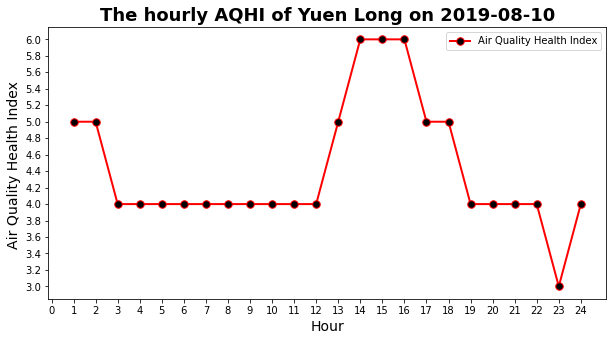

Q2. Visualize the daily mean AQHI of your home district on your birthday month in 2019 (e.g., Kwun Tong,  January) using a line graph.



Q3. Visualize the hourly AQHI of all Hong Kong districts on your birthday in 2019 (e.g., 01 January 2019) using a heatmap with an appropriate colour map.



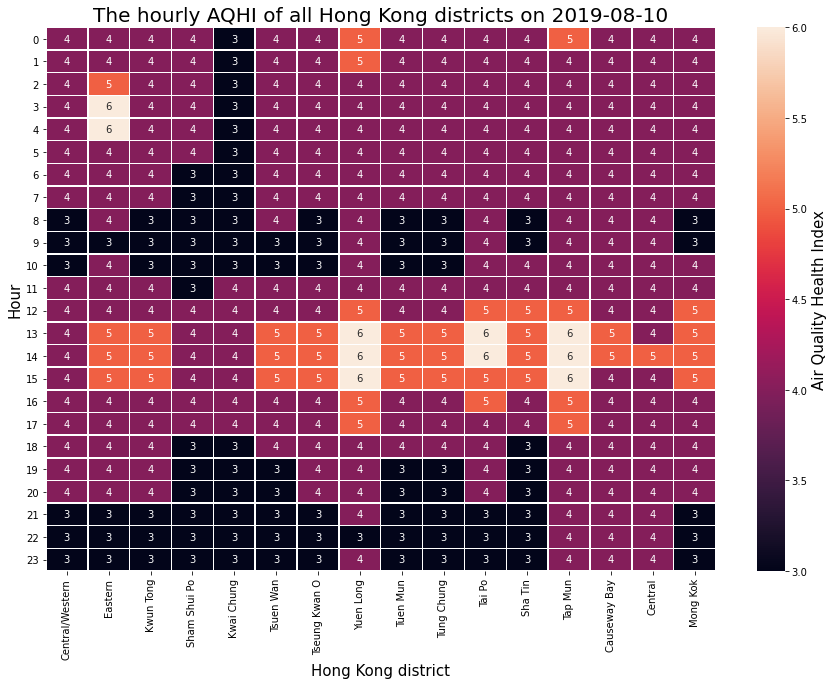

In [5]:
b = Basic_analysis(a.dataset[5], 'Yuen Long', '2019-08-10')
#please follow the order to display the graph of basic analysis
b.main()

## Exploratory analysis and visualization

In [6]:
class Exploratory_analysis:
    def __init__(self, dataset, year, location1, location2, location3, number = 1, years_list = []):
        self.all_dataset = dataset                     # ALl selected dataset 
        self.title_year = year                         # Set the selected year on title for visualising the graph
        self.location1 = location1                      #The selected hong kong districts 1 e.g. Yuen Long
        self.location2 = location2                      #The selected hong kong districts 2 e.g. Mong Kok
        self.location3 = location3                      #The selected hong kong districts 3 e.g. Causeway Bay
        self.number_of_dataset = number                 #The chosen numbe of dataset such as 0,1,2,3,4,5,6       
        self.years_list = years_list
        
    def question_one(self):                             #Using the seaborn visualising the following data 
        print('Q1 Visualize and Compare the trends of the daily maximum AQHI of August from {} of {} and {}'.format(self.title_year, self.location1, self.location2))
        location1 = []
        b = self.all_dataset
        for j in range(len(b)):
            for i in b[j].index.get_level_values('Date').unique().values:  #Stored all Air Quality Health Index according to specific data and location
                a = b[j].loc[i,self.location1][:24].max() 
                location1.append(a)
                
        location2 = []
        for j in range(len(b)):
            for i in b[j].index.get_level_values('Date').unique().values: #Stored all Air Quality Health Index according to specific data and location
                a = b[j].loc[i,self.location2][:24].max() 
                location2.append(a) 
                
        date = []
        for i in range(len(b)):
            for j in range(len(b[i].index.get_level_values('Date').unique().values)): #Stored all date 
                date.append(b[i].index.get_level_values('Date').unique().values[j])
                
        twolocations = pd.DataFrame(data={'Date':date,self.location1:location1, self.location2:location2})  #Build a dataframe
        twolocations.set_index('Date', inplace = True)                                                       # set the index
        #Initialzing graph attributes
        plt.figure(figsize=(300,150))                                                          
        sns.set_style("dark")
        sns.lineplot(data=twolocations,linewidth=10)                                                            #Using the seaborn
        plt.title('The trends of the daily maximum AQHI of December from {} of {} and {}'.format(self.title_year, self.location1, self.location2),fontsize = 200)
        plt.xticks(fontsize = 70,rotation=70)
        plt.yticks(fontsize = 200)
        plt.ylabel('Air Quality Health Index',fontsize=200)
        plt.xlabel('Date',fontsize=200)
        plt.title('the trends of the daily maximum AQHI of December from {} of {} and {}'.format(self.title_year, self.location1, self.location2))
        legend = plt.legend(prop={"size":200},borderaxespad=0.,shadow=True)
        legend.get_frame().set_facecolor('white')
        plt.savefig('EDAq1.jpg')
        plt.show()
        
    def question_two(self):
        print('Q2 The distribution of Air Quality Health Index')                                                #Stored all Air Quality Health Index according to specific data and location
        j = [self.all_dataset[self.number_of_dataset].loc[i,self.location1][:24] for i in self.all_dataset[self.number_of_dataset].index.get_level_values('Date').unique().values]
        df = pd.DataFrame(j).values.tolist()                                                                    # Build a dataframe to change to  a list
        #Initialzing graph attributes
        plt.figure(figsize = (20,10))
        plt.style.use('seaborn-darkgrid')                                                                       #Using the matplotlib 
        labels = [i for i in self.all_dataset[self.number_of_dataset].index.get_level_values('Date').unique().values]
        plt.ylabel('Index', fontsize = 12)
        plt.title('The distribution of Air Quality Health Index', fontsize = 12)
        plt.boxplot(df, vert=True, 
                    patch_artist=True,
                    labels=labels,
                    showfliers=True,
                    showmeans=True,
                    notch=False,
                    boxprops = dict(facecolor='pink'))
        plt.xticks(rotation= 45)
        plt.savefig('EDAq2.jpg')
        plt.show() 
        
    def question_three(self):
        all_mean_list = []
        location_list = [self.location1,self.location2,self.location3]     # The list of selected location
        for a in location_list:
            sub_mean_list = []
            for j in range(len(self.all_dataset)):                          # Calculated the mean of Air Quality Health Index and Stored it according to specific data and location
                c = np.mean([self.all_dataset[j].loc[i,a][:24].mean() for i in self.all_dataset[j].index.get_level_values('Date').unique().values])
                sub_mean_list.append(c)
            all_mean_list.append(sub_mean_list)
        list1 = [];list2 = [];list3 = [];list4 = [];list5 = [];list6 = []
        for i in range(len(all_mean_list)):
            list1.append(all_mean_list[i][0])           # The list of the mean of Air Quality Health Index in first year
            list2.append(all_mean_list[i][1])           # The list of the mean of Air Quality Health Index in second year
            list3.append(all_mean_list[i][2])           # and so on...
            list4.append(all_mean_list[i][3])
            list5.append(all_mean_list[i][4])
            list6.append(all_mean_list[i][5])
        years = self.years_list
        #Initialzing graph attributes                                   #Using the bokeh visualises the data. # And Siding on the graph displays the data
        data = {'location':location_list,'2014':list1,'2015':list2,'2016':list3,'2017':list4,'2018':list5,'2019':list6}
        source = ColumnDataSource(data=data)
        p = figure(x_range = data['location'], plot_width = 1000, plot_height = 600, title ="The mean of Air Quality Health Index of Six Years in Three Hong Kong districts", tools = '',x_axis_label = 'Hong Kong districts', y_axis_label = 'The mean of Air Quality Health Index')

        vbar1 = p.vbar(x = dodge('location', -0.25, range = p.x_range), top = '2014', width = 0.1, source = source,color = Spectral6[0], legend = value(self.years_list[0]))
        hover_tool_vbar1 = HoverTool(tooltips = [('2014', '@2014{0.000}')], show_arrow = False, renderers = [vbar1])

        vbar2 = p.vbar(x = dodge('location', -0.15, range = p.x_range), top = '2015', width = 0.1, source = source,color = Spectral6[1], legend = value(self.years_list[1]))
        hover_tool_vbar2 = HoverTool(tooltips = [('2015', '@2015{0.000}')], show_arrow = False, renderers = [vbar2])

        vbar3 = p.vbar(x = dodge('location', -0.05, range = p.x_range), top = '2016', width = 0.1, source = source,color = Spectral6[2], legend = value(self.years_list[2]))
        hover_tool_vbar3 = HoverTool(tooltips = [('2016', '@2016{0.000}')], show_arrow = False, renderers = [vbar3])

        vbar4 = p.vbar(x = dodge('location', 0.05, range = p.x_range), top = '2017', width = 0.1, source = source,color = Spectral6[3], legend = value(self.years_list[3]))
        hover_tool_vbar4 = HoverTool(tooltips = [('2017', '@2017{0.000}')], show_arrow = False, renderers = [vbar4])

        vbar5 = p.vbar(x = dodge('location', 0.15, range = p.x_range), top = '2018', width = 0.1, source = source,color = Spectral6[4], legend = value(self.years_list[4]))
        hover_tool_vbar5 = HoverTool(tooltips = [('2018', '@2018{0.000}')], show_arrow = False, renderers = [vbar5])

        vbar6 = p.vbar(x = dodge('location', 0.25, range = p.x_range), top = '2019', width = 0.1, source = source,color = Spectral6[5], legend = value(self.years_list[5]))
        hover_tool_vbar6 = HoverTool(tooltips = [('2019', '@2019{0.000}')], show_arrow = False, renderers = [vbar6])
        
        p.x_range.range_padding = 0.2
        p.xgrid.grid_line_color = None
        p.legend.location ="top_right"
        p.legend.click_policy = 'hide'
        p.legend.orientation ="horizontal"

        p.add_tools(hover_tool_vbar1, hover_tool_vbar2, hover_tool_vbar3, hover_tool_vbar4, hover_tool_vbar5, hover_tool_vbar6)
        show(p)
        
    def question_four(self):
        print('Q4 The label of Air Quality Health Index in August')                 #Calculated the mean of Air Quality Health Index and Stored it according to specific date and location
        j = [self.all_dataset[1].loc[i,self.location1][:24].mean() for i in self.all_dataset[self.number_of_dataset].index.get_level_values('Date').unique().values]
        df1 = pd.DataFrame({'index':j,'date':self.all_dataset[self.number_of_dataset].index.get_level_values('Date').unique().values})
        df1.set_index('date',inplace = True)
        label = []
        for i in df1['index']:                  #Labeling the each value according the website of label of Air Quality Health Index
            if 1<=i<4:
                label.append('Low')
            elif 4<=i<7:
                label.append('Moderate')
            elif i<8:
                label.append('High')
            elif 8<=i<=10:
                label.append('Very High')
            else:
                label.append('Serious')
        df1['label'] = label
        #Initialzing graph attributes          #Using the seaborn show all label of the Air Quality Health Index
        sns.relplot(x="date", y="index", hue="label", data=df1)
        plt.title('The label of Air Quality Health Index in August')
        plt.xticks(rotation = 90)
        plt.ylabel('Air Quality Health Index')
        plt.xlabel('Date')
        plt.savefig('EDAq4.jpg')
        plt.show()
            
    def main(self):
        self.question_one()
        self.question_two()
        self.question_three()
        self.question_four()

In [7]:
year = '2014-2020'
location1 = 'Causeway Bay'
location2 = 'Mong Kok'
location3 = 'Yuen Long'
years_list = ['2014','2015','2016','2017','2018','2019']
#please follow the order to display the graph of exploratory analysis
c = Exploratory_analysis(a.dataset, year, location1, location2, location3, 1 , years_list)
c.main()

Q1 Visualize and Compare the trends of the daily maximum AQHI of August from 2014-2020 of Causeway Bay and Mong Kok


Q2 The distribution of Air Quality Health Index


Q4 The label of Air Quality Health Index in August
